In [ ]:
import sklearn
sklearn.naive_bayes

In [24]:
import sklearn
print(dir(sklearn))

['_BUILT_WITH_MESON', '__SKLEARN_SETUP__', '__all__', '__builtins__', '__cached__', '__check_build', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_built_with_meson', '_config', '_distributor_init', '_loss', 'base', 'clone', 'compose', 'config_context', 'datasets', 'decomposition', 'dummy', 'ensemble', 'exceptions', 'externals', 'feature_extraction', 'get_config', 'linear_model', 'logger', 'logging', 'metrics', 'model_selection', 'naive_bayes', 'neighbors', 'os', 'pipeline', 'preprocessing', 'random', 'set_config', 'setup_module', 'show_versions', 'sklearn', 'svm', 'sys', 'tree', 'utils']


In [ ]:
help(sklearn)

In [ ]:
from sklearn import naive_bayes
help(sklearn.naive_bayes.GaussianNB)

In [ ]:
from sklearn import datasets
help(sklearn.datasets)

In [ ]:
print(dir(sklearn.naive_bayes))

In [11]:
print(dir(sklearn.datasets))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_arff_parser', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_f

In [14]:
from sklearn import model_selection 
print(dir(sklearn.model_selection))

['BaseCrossValidator', 'BaseShuffleSplit', 'FixedThresholdClassifier', 'GridSearchCV', 'GroupKFold', 'GroupShuffleSplit', 'KFold', 'LearningCurveDisplay', 'LeaveOneGroupOut', 'LeaveOneOut', 'LeavePGroupsOut', 'LeavePOut', 'ParameterGrid', 'ParameterSampler', 'PredefinedSplit', 'RandomizedSearchCV', 'RepeatedKFold', 'RepeatedStratifiedKFold', 'ShuffleSplit', 'StratifiedGroupKFold', 'StratifiedKFold', 'StratifiedShuffleSplit', 'TimeSeriesSplit', 'TunedThresholdClassifierCV', 'ValidationCurveDisplay', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_classification_threshold', '_plot', '_search', '_split', '_validation', 'check_cv', 'cross_val_predict', 'cross_val_score', 'cross_validate', 'learning_curve', 'permutation_test_score', 'train_test_split', 'typing', 'validation_curve']


In [77]:
from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

## Breast Cancer Dataset

In [22]:
df=load_breast_cancer()
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [31]:
import pandas as pd 
cancer=pd.DataFrame(df.data,columns=df.feature_names)

In [33]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [34]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [35]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
#Jupyter only
pd.DataFrame?

In [ ]:
print(pd.DataFrame.__doc__)

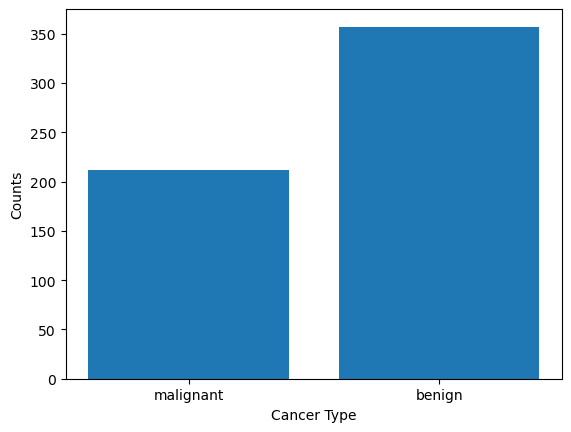

In [57]:
counts=pd.Series(df.target).value_counts().sort_index()
target_names=df.target_names
plt.bar(target_names,counts)
plt.xlabel("Cancer Type")
plt.ylabel("Counts")
plt.show()

In [58]:
counts

0    212
1    357
Name: count, dtype: int64

In [59]:
print(dir(plt))

['AbstractContextManager', 'Annotation', 'Arrow', 'Artist', 'AutoLocator', 'AxLine', 'Axes', 'BackendFilter', 'Button', 'Circle', 'Colormap', 'Enum', 'ExitStack', 'Figure', 'FigureBase', 'FigureCanvasBase', 'FigureManagerBase', 'FixedFormatter', 'FixedLocator', 'FormatStrFormatter', 'Formatter', 'FuncFormatter', 'GridSpec', 'IndexLocator', 'Line2D', 'LinearLocator', 'Locator', 'LogFormatter', 'LogFormatterExponent', 'LogFormatterMathtext', 'LogLocator', 'MaxNLocator', 'MouseButton', 'MultipleLocator', 'Normalize', 'NullFormatter', 'NullLocator', 'PolarAxes', 'Polygon', 'Rectangle', 'ScalarFormatter', 'Slider', 'Subplot', 'SubplotSpec', 'TYPE_CHECKING', 'Text', 'TickHelper', 'Widget', '_NO_PYPLOT_NOTE', '_REPL_DISPLAYHOOK', '_ReplDisplayHook', '__annotations__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_add_pyplot_note', '_api', '_auto_draw_if_interactive', '_backend_mod', '_color_sequences', '_colormaps', '_copy_docstrin

In [49]:
plt.bar?

Signature:
plt.bar(
    x: 'float | ArrayLike',
    height: 'float | ArrayLike',
    width: 'float | ArrayLike' = 0.8,
    bottom: 'float | ArrayLike | None' = None,
    *,
    align: "Literal['center', 'edge']" = 'center',
    data=None,
    **kwargs,
) -> 'BarContainer'
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

    Note that if *bottom* has units (e.g. datetime), *height* should be in
    units that are a difference from the value of *bottom* (e.g. timedelta).

width : float or array-like, default: 0.8
    The width(s) 

### K Nearest Neighbour 

In [71]:
model=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(model,df.data,df.target,cv=5)

print("#---- KFold CV -------#")
print("Scores:", scores)
print("Average:", scores.mean())

skf=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
scores=cross_val_score(model,df.data,df.target,cv=skf)

print("\n#----Stratified KFold CV -------#")
print("Scores:", scores)
print("Average:", scores.mean())

#---- KFold CV -------#
Scores: [0.88596491 0.93859649 0.93859649 0.94736842 0.92920354]
Average: 0.9279459711224964

#----Stratified KFold CV -------#
Scores: [0.92982456 0.90350877 0.92982456 0.95614035 0.95575221]
Average: 0.9350100916006833


### Gaussian Naive Bayes

In [76]:
model=GaussianNB()
scores=cross_val_score(model,df.data,df.target,cv=5)

print("#-----KFold------#")
print("Scores on each fold:", scores)
print("Average Score:", scores.mean())

skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores=cross_val_score(model,df.data,df.target,cv=skf)

print("#-----Stratified KFold------#")
print("Scores on each fold:", scores)
print("Average Score:", scores.mean())

#-----KFold------#
Scores on each fold: [0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]
Average Score: 0.9385188635305075
#-----Stratified KFold------#
Scores on each fold: [0.96491228 0.90350877 0.92982456 0.92982456 0.96460177]
Average Score: 0.9385343890700202


In [73]:
cross_val_score?

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

    .

In [74]:
StratifiedKFold?

Init signature: StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None)
Docstring:     
Stratified K-Fold cross-validator.

Provides train/test indices to split data in train/test sets.

This cross-validation object is a variation of KFold that returns
stratified folds. The folds are made by preserving the percentage of
samples for each class.

Read more in the :ref:`User Guide <stratified_k_fold>`.

For visualisation of cross-validation behaviour and
comparison between common scikit-learn split methods
refer to :ref:`sphx_glr_auto_examples_model_selection_plot_cv_indices.py`

Parameters
----------
n_splits : int, default=5
    Number of folds. Must be at least 2.

    .. versionchanged:: 0.22
        ``n_splits`` default value changed from 3 to 5.

shuffle : bool, default=False
    Whether to shuffle each class's samples before splitting into batches.
    Note that the samples within each split will not be shuffled.

random_state : int, RandomState instance or None, default=N

## Wine Dataset

In [79]:
df=load_wine()
print(df.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [82]:
wine=pd.DataFrame(df.data,columns=df.feature_names)

In [83]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [86]:
df.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

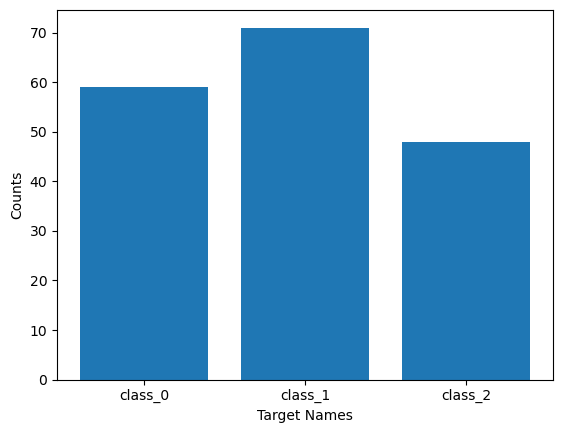

In [87]:
target_counts=pd.Series(df.target).value_counts().sort_index()
target_names=df.target_names
plt.bar(target_names,target_counts)
plt.xlabel("Target Names")
plt.ylabel("Counts")
plt.show()

### Support Vector Classifier 

In [93]:
model=SVC()
scores=cross_val_score(model, df.data,df.target,cv=5)

print("#----KFold ----#")
print("Scores on each fold:", scores)
print("Average Score:", scores.mean())

skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores=cross_val_score(model, df.data,df.target,cv=skf)

print("#\n----Stratified KFold ----#")
print("Scores on each fold:", scores)
print("Average Score:", scores.mean())

#----KFold ----#
Scores on each fold: [0.63888889 0.61111111 0.63888889 0.68571429 0.74285714]
Average Score: 0.6634920634920635
#
----Stratified KFold ----#
Scores on each fold: [0.63888889 0.69444444 0.63888889 0.65714286 0.74285714]
Average Score: 0.6744444444444444


In [95]:
model=RandomForestClassifier()
scores=cross_val_score(model, df.data,df.target,cv=5)

print("#----KFold ----#")
print("Scores on each fold:", scores)
print("Average Score:", scores.mean())

skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores=cross_val_score(model, df.data,df.target,cv=skf)

print("#\n----Stratified KFold ----#")
print("Scores on each fold:", scores)
print("Average Score:", scores.mean())

#----KFold ----#
Scores on each fold: [0.94444444 0.94444444 0.97222222 0.97142857 1.        ]
Average Score: 0.9665079365079364
#
----Stratified KFold ----#
Scores on each fold: [0.97222222 1.         0.97222222 0.94285714 1.        ]
Average Score: 0.9774603174603176
